In [2]:
pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 21.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

Long Short-Term Memory (LSTM)


In [69]:
#Importing all necessary libraries
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection  import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
#Acquiring stock data from yFinance
stock_data = yf.download('^NSEI', start='2020-01-01', end='2023-01-01')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
2020-01-02 00:00:00+05:30,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2020-01-03 00:00:00+05:30,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
2020-01-06 00:00:00+05:30,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
2020-01-07 00:00:00+05:30,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


Text(0, 0.5, 'Prices')

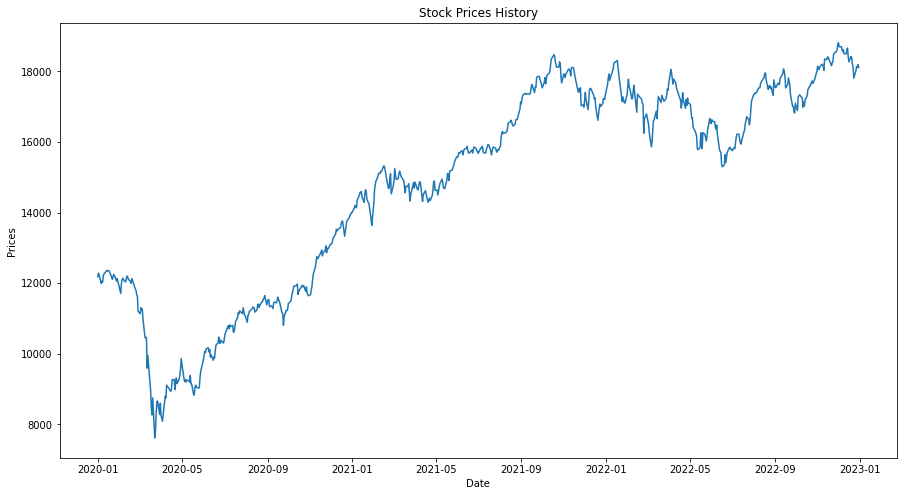

In [5]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices')

In [6]:
#Preparation of training set
close_prices = stock_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [7]:
#Preparation of test set
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [8]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
537/537 [==============================] - 35s 59ms/step - loss: 0.0062
Epoch 2/3
537/537 [==============================] - 20s 37ms/step - loss: 0.0015
Epoch 3/3
537/537 [==============================] - 19s 35ms/step - loss: 0.0017


In [10]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

5/5 [==============================] - 1s 30ms/step


196.31425650167785

<ipython-input-11-d92c50f720f0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


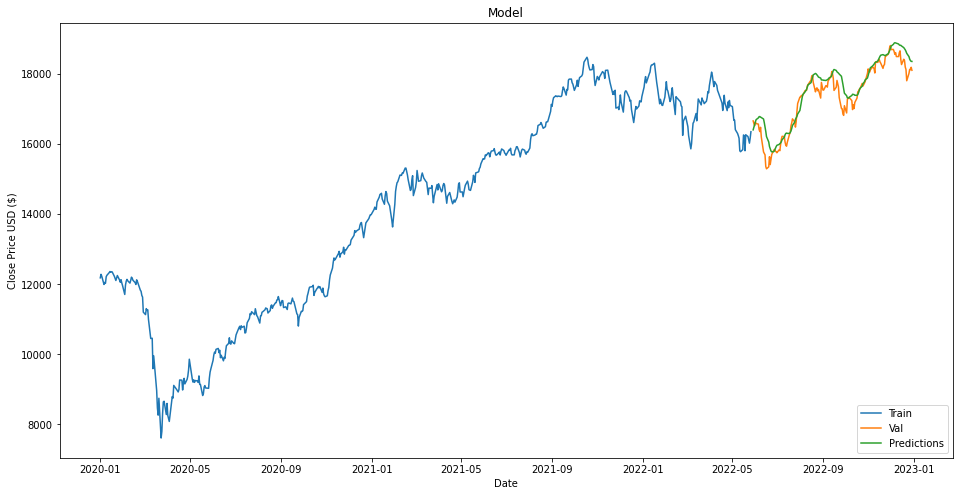

In [11]:
data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from pandas_datareader import data as pdr
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [53]:
stock_data['Open-Close']= stock_data.Open -stock_data.Close
stock_data['High-Low']  = stock_data.High - stock_data.Low
stock_data =stock_data.dropna()
X= stock_data[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,19.650391,56.900391
1,-83.650391,94.650391
2,34.449219,74.250000
3,177.549805,204.899414
4,26.149414,146.800781


In [54]:
# Target variable
Y= np.where(stock_data['Close'].shift(-1)>stock_data['Close'],1,-1)

In [55]:
# Splitting the dataset
split_percentage = 0.7
split = int(split_percentage*len(stock_data))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [56]:
# Instantiate KNN learning model(k=15)
knn = KNeighborsClassifier(n_neighbors=15)

# fit the model
knn.fit(X_train, Y_train)

# Accuracy Score
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.63
Test_data Accuracy: 0.48


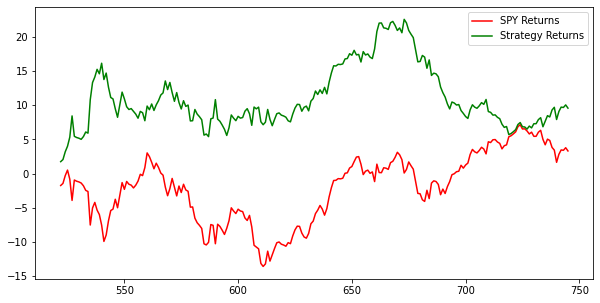

In [57]:
# Predicted Signal
stock_data['Predicted_Signal'] = knn.predict(X)

# SPY Cumulative Returns
stock_data['SPY_returns'] = np.log(stock_data['Close']/stock_data['Close'].shift(1))
Cumulative_SPY_returns = stock_data[split:]['SPY_returns'].cumsum()*100

# Cumulative Strategy Returns 
stock_data['Startegy_returns'] = stock_data['SPY_returns']* stock_data['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = stock_data[split:]['Startegy_returns'].cumsum()*100

# Plot the results to visualize the performance

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_returns, color='r',label = 'SPY Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

Linear Regression

In [12]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,746.000000,746.000000,746.000000,746.000000,746.000000,7.460000e+02
mean,14808.918361,14892.066618,14697.324584,14798.596445,14798.596445,4.499288e+05
std,2896.161275,2891.285108,2900.832096,2898.403194,2898.403194,2.312172e+05
min,7735.149902,8036.950195,7511.100098,7610.250000,7610.250000,0.000000e+00
25%,12115.925293,12152.787842,12029.949707,12082.924805,12082.924805,2.664500e+05
50%,15736.949707,15791.575195,15653.975098,15725.050293,15725.050293,3.990000e+05
75%,17323.312988,17388.462891,17215.762207,17325.200684,17325.200684,6.070250e+05
max,18871.949219,18887.599609,18778.199219,18812.500000,18812.500000,1.811000e+06


In [13]:
x = stock_data[['High','Low','Open','Volume']].values

In [14]:
y = stock_data['Close'].values

In [70]:
# splitting x and y into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [36]:
from sklearn.linear_model import LinearRegression

In [39]:
regressor = LinearRegression()

In [40]:
regressor.fit(x_train, y_train)

LinearRegression()

In [41]:
# making predictions on the testing set
predicted = regressor.predict(x_test)
predicted

array([18565.67931677, 16480.83601682, 10455.27734645, 10660.14634124,
       12178.58712618, 11238.5999736 , 14311.63489549, 11190.39550424,
       19132.08183179, 10611.94187188, 13395.74997759, 14697.27065039,
       14805.73070646, 12395.50723831, 10768.60639731, 18927.21283699,
       14986.49746657, 15757.76897638, 15986.74020585, 11648.33796318,
       14865.98629316, 18915.16171965, 14347.78824751, 14516.50389028,
       17878.76562835, 13130.6253961 , 12166.53600884, 10949.37315742,
       15094.95752264, 16999.03406247, 10382.97064241, 13287.28992153,
       16263.91590469, 18794.65054625, 18336.7080873 , 17408.77205206,
       13552.41450302, 17071.34076652, 16661.60277693, 16685.70501162,
       14058.56143133, 18011.3279191 , 13058.31869205, 10298.61282102,
       16601.34719023, 17240.05640929, 15601.10445095, 18047.48127112,
       15070.85528796, 13311.39215621, 17155.6985879 , 15119.05975732,
       14094.71478336, 17276.20976131, 14299.58377815, 19180.28630115,
      


Using Regression future trend predict

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [33]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01 00:00:00+05:30,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
1,2020-01-02 00:00:00+05:30,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2,2020-01-03 00:00:00+05:30,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
3,2020-01-06 00:00:00+05:30,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
4,2020-01-07 00:00:00+05:30,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


In [34]:
stock_data = stock_data.reset_index()
x = np.array(stock_data.index).reshape(-1, 1)
y = stock_data['Close']

In [47]:
linreg = LinearRegression().fit(x, y)
linreg.score(x, y)
predictions = linreg.predict(x)

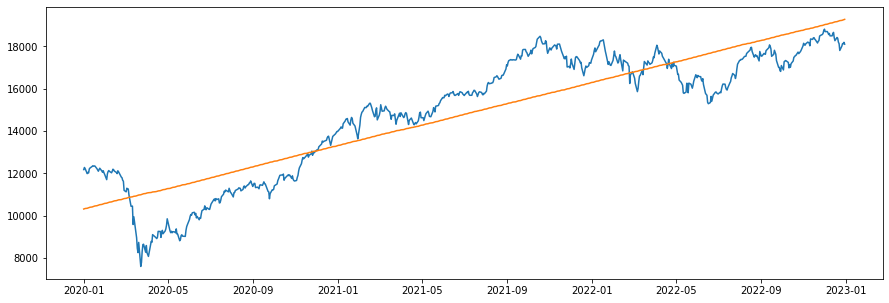

In [48]:
plt.figure(figsize=(15,5))
plt.plot(data['Close'])
plt.plot(data.index, predictions)

In [49]:
print('R^2:', linreg.score(x, y))

R^2: 0.7986493308685425


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from pandas_datareader import data as pdr
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


KNN from Scratch

In [17]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
2020-01-02 00:00:00+05:30,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2020-01-03 00:00:00+05:30,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
2020-01-06 00:00:00+05:30,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
2020-01-07 00:00:00+05:30,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


Text(0, 0.5, 'Prices')

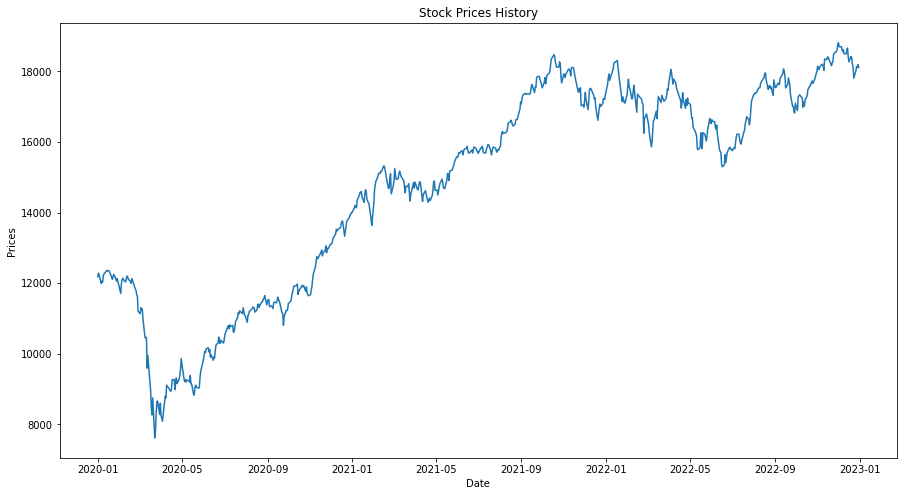

In [18]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices')

In [19]:
x = stock_data[['High','Low','Open','Volume']].values

In [20]:
y = stock_data['Close'].values

In [21]:
import numpy as np
import pandas as pd
import statistics as stats

def distance (x,p): 
        l=list(map(lambda x,y:(x-y)**2,x,p))
        return np.sqrt(sum(l))

class KNearestNeighbours : 
    def __init__(self,n_neighbors=5): 
        self.n_neighbors=n_neighbors 
        self.feature_names=[]
        self.target_names=[]
        self.num_sampels=0
        self.x=0
        self.y=0
        self.predicted_values=0

    def fit(self,x,y): 
        if isinstance(x,pd.DataFrame): 
            self.feature_names = [f for f in x.columns]
            self.x=np.array(x)
        else:
            self.x=x 
        if isinstance(y,pd.DataFrame): 
            self.target_names = [f for f in y.columns]
            self.y=np.array(y).reshape(-1)
        else:
            self.y=y 
        
        if np.isnan(self.x).any() or np.isnan(self.y).any(): 
            raise Exception("model does not accept NAN values")
            
        self.num_sampels=len(x)
        
    def predict(self, p): 
        predict_values=[] 
        p=np.array(p) 
        for i in p: 
            p = dict(sorted(self._predictions(i).items())[0:self.n_neighbors]) 
            predict_values.append(stats.mode(p.values())) 
        self.predicted_values=predict_values
        return predict_values

    def _predictions(self,p):
        d=dict()
        for x,y in zip(self.x,self.y):
            dis=distance(x,p)
            d.update({dis:y})
        return d

In [62]:
knnn=KNearestNeighbours()
knnn.fit(X_train, Y_train)

In [63]:
accuracy_train = accuracy_score(Y_train, knnn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knnn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.69
Test_data Accuracy: 0.47


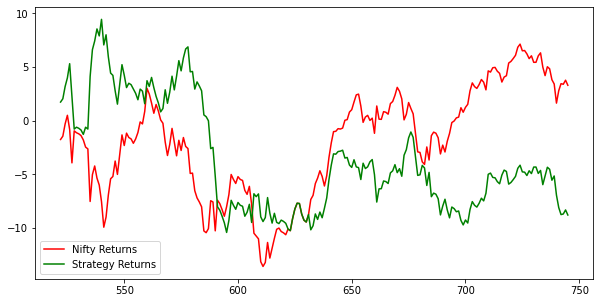

In [66]:
# Predicted Signal
stock_data['Predicted_Signal'] = knnn.predict(X)

# Nifty Cumulative Returns
stock_data['Nifty_returns'] = np.log(stock_data['Close']/stock_data['Close'].shift(1))
Cumulative_SPY_returns = stock_data[split:]['Nifty_returns'].cumsum()*100

# Cumulative Strategy Returns 
stock_data['Startegy_returns'] = stock_data['Nifty_returns']* stock_data['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = stock_data[split:]['Startegy_returns'].cumsum()*100

# Plot the results to visualize the performance

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_returns, color='r',label = 'Nifty Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

Indian Stock Market before Covid 19 and after Covid 19


In [24]:
Beforecovid = yf.download('^NSEI', start='2016-01-01', end='2020-02-01')
Beforecovid.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04 00:00:00+05:30,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700
2016-01-05 00:00:00+05:30,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200
2016-01-06 00:00:00+05:30,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100
2016-01-07 00:00:00+05:30,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900
2016-01-08 00:00:00+05:30,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400


In [25]:
Aftercovid = yf.download('^NSEI', start='2020-02-01', end='2020-08-01')
Aftercovid.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-03 00:00:00+05:30,11627.450195,11749.849609,11614.500000,11707.900391,11707.900391,669800
2020-02-04 00:00:00+05:30,11786.250000,11986.150391,11783.400391,11979.650391,11979.650391,560400
2020-02-05 00:00:00+05:30,12005.849609,12098.150391,11953.349609,12089.150391,12089.150391,758000
2020-02-06 00:00:00+05:30,12120.000000,12160.599609,12084.650391,12137.950195,12137.950195,565100
2020-02-07 00:00:00+05:30,12151.150391,12154.700195,12073.950195,12098.349609,12098.349609,473500


Text(0, 0.5, 'Prices')

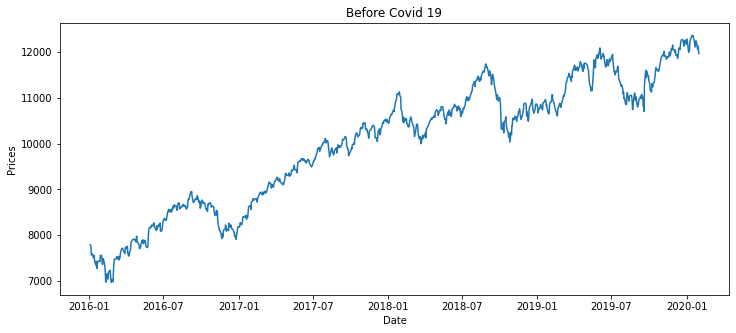

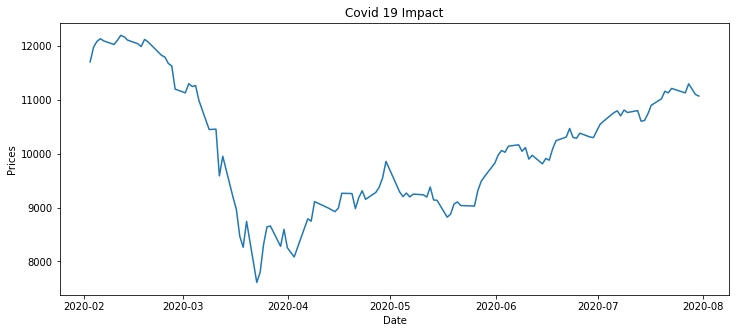

In [26]:
plt.figure(figsize=(12, 5))
plt.title('Before Covid 19')
plt.plot(Beforecovid['Close'])
plt.xlabel('Date')
plt.ylabel('Prices')

plt.figure(figsize=(12, 5))
plt.title('Covid 19 Impact')
plt.plot(Aftercovid['Close'])
plt.xlabel('Date')
plt.ylabel('Prices')
